In [35]:
import pandas as pd
import numpy as np
from scipy import stats
f = pd.read_csv("train.csv")
f

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [36]:
x = f['GrLivArea']
y = f['SalePrice']
f = pd.concat([x, y], axis = 1)
f.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


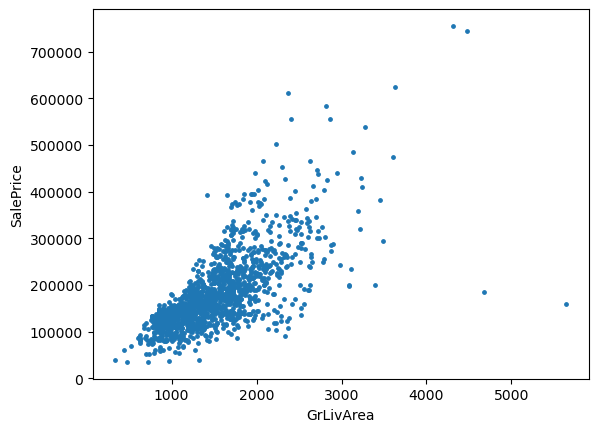

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 6)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [63]:
def plot_boxplot(f,ft):
    f.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

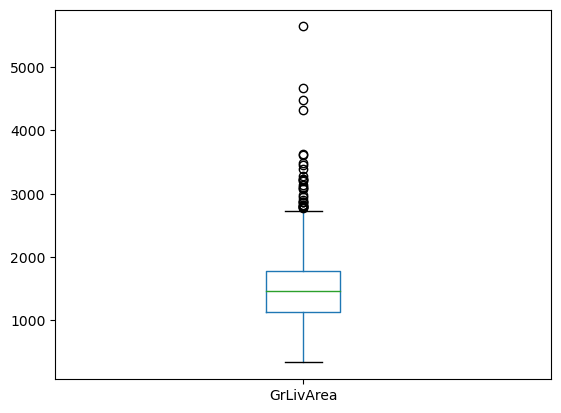

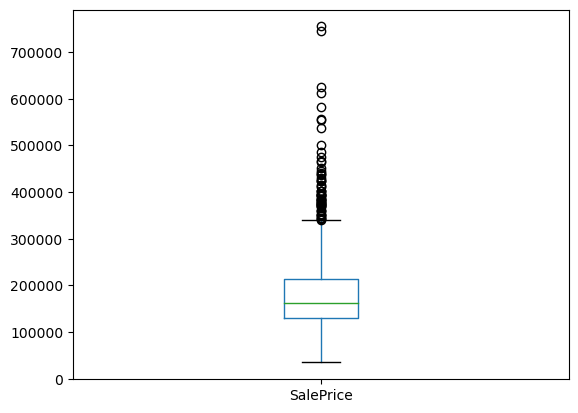

In [65]:
plot_boxplot(f, 'GrLivArea')
plot_boxplot(f, 'SalePrice')

In [46]:
def outliers(f,ft):
    Q1 = f[ft].quantile(0.25)
    Q3 = f[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = f.index[(f[ft] < lower_bound) | (f[ft] > upper_bound)]
    return ls

In [61]:
index_list = []
for new in ['GrLivArea', 'SalePrice']:
    index_list.extend(outliers(f, new))


In [51]:
def remove(f, ls):
    ls = sorted(set(ls))
    f = f.drop(ls)
    return f

In [52]:
f_cleaned = remove(f, index_list)

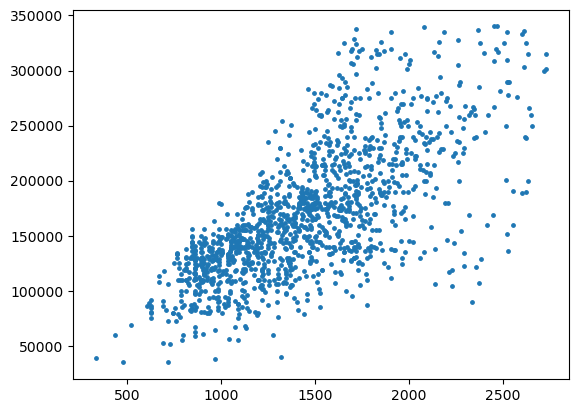

In [57]:
plt.scatter(f_cleaned['GrLivArea'], f_cleaned['SalePrice'], s = 6)


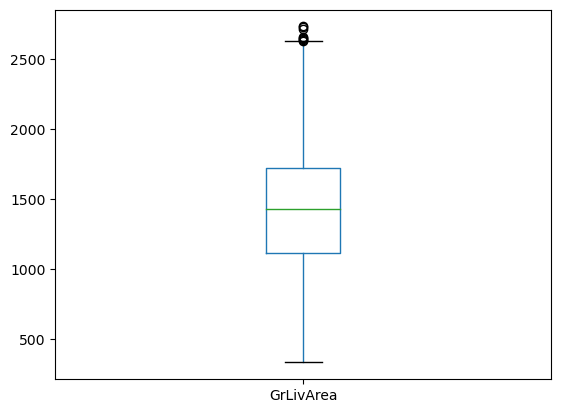

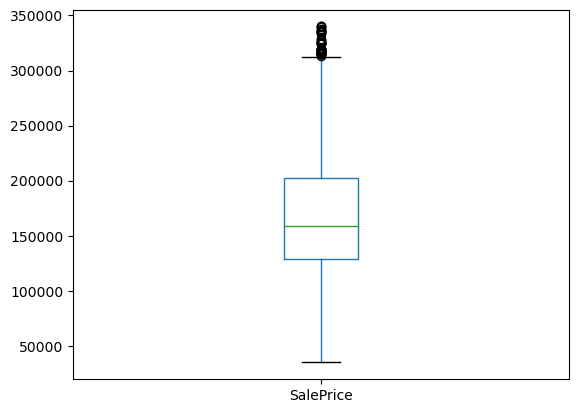

In [67]:
plot_boxplot(f_cleaned, 'GrLivArea')
plot_boxplot(f_cleaned, 'SalePrice')

In [68]:
f_cleaned.to_csv('cleaned.csv', index = False)

In [110]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
f = pd.read_csv("train.csv")
f

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [111]:
x = f['1stFlrSF']
y = f['2ndFlrSF']
x = (x-min(x))/(max(x)-min(x))*10
y = (y-min(y))/(max(y)-min(y))*10
f = pd.concat([x, y], axis = 1)
f.head()

,1stFlrSF,2ndFlrSF
0,1.197797,4.135593
1,2.129417,0.000000
2,1.344654,4.193705
3,1.438733,3.661017
4,1.860945,5.099274


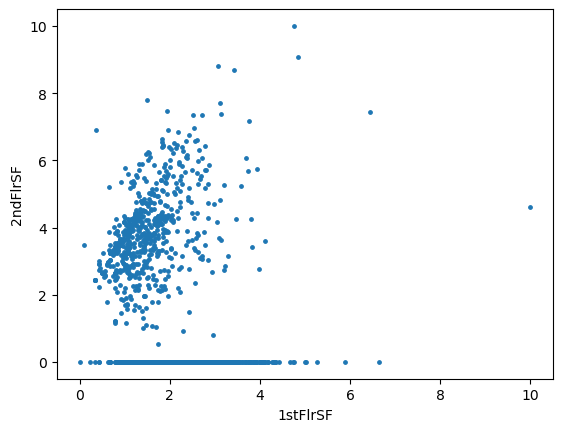

In [112]:
plt.scatter(x,y,s=6)
plt.xlabel('1stFlrSF')
plt.ylabel('2ndFlrSF')
plt.show()

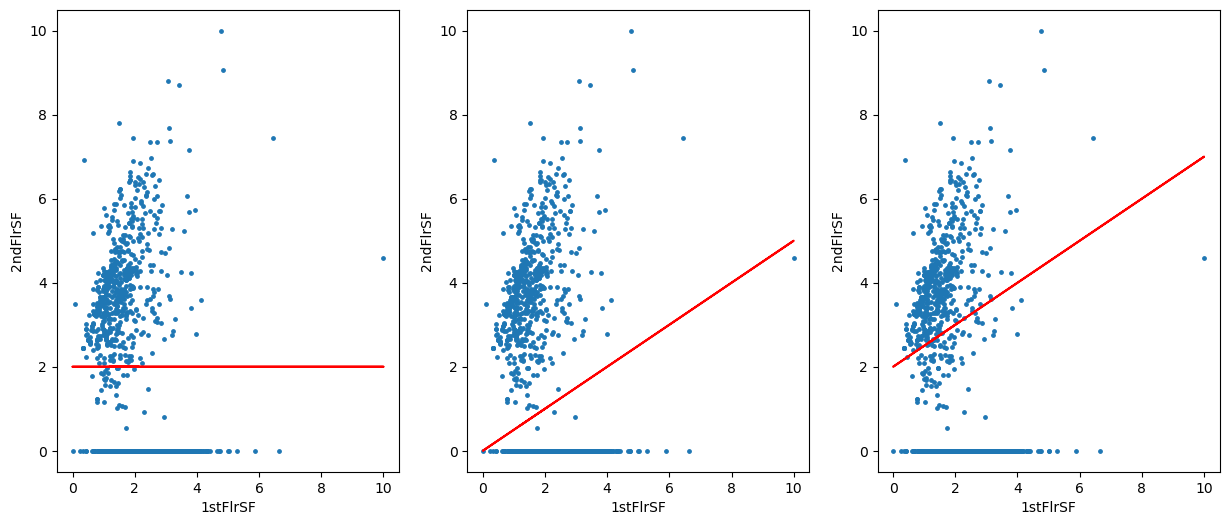

In [113]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].scatter (x, y, 6)
axs[0].set_xlabel('1stFlrSF')
axs[0].set_ylabel('2ndFlrSF')
a = 2
b = 0
axs[0].plot(x,a + b * x, color = 'red')


axs[1].scatter(x,y,s=6)
axs[1].set_xlabel('1stFlrSF')
axs[1].set_ylabel('2ndFlrSF')
a = 0
b = 0.5
axs[1].plot(x,a + b * x, color = 'red')


axs[2].scatter(x,y,s=6)
axs[2].set_xlabel('1stFlrSF')
axs[2].set_ylabel('2ndFlrSF')
a = 2
b = 0.5
axs[2].plot(x,a + b * x, color = 'red')


plt.show()

In [114]:
from sklearn.metrics import r2_score
r2_score(x,y)

-6.706849162717362

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
f = pd.read_csv("train.csv")
x = f[['1stFlrSF', '2ndFlrSF']]
y = f['SalePrice']
lm = LinearRegression()
lm.fit(x,y)
lm.coef_
predictions = lm.predict(x)

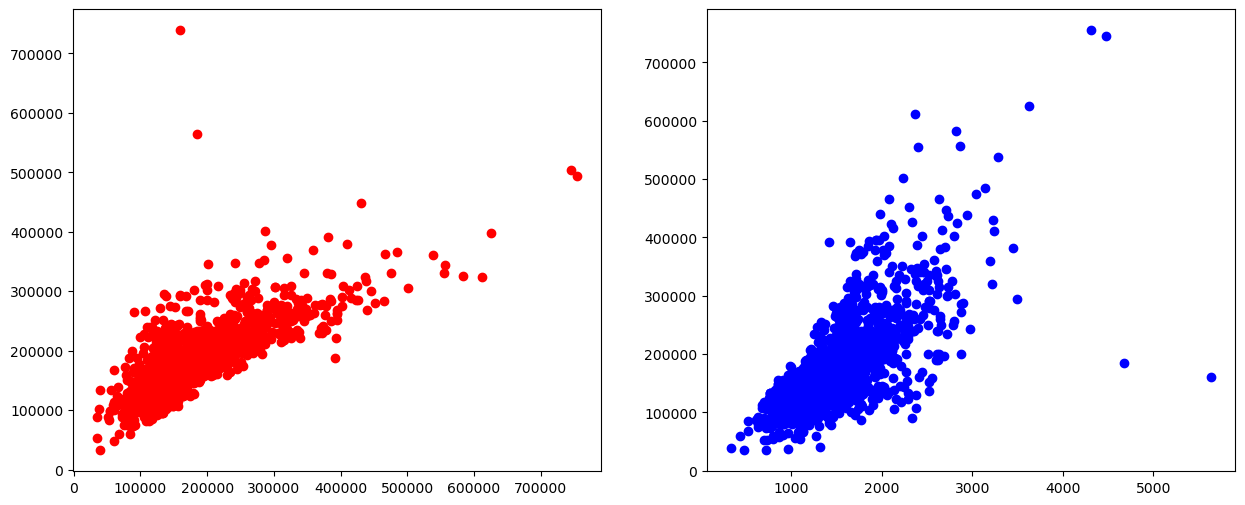

In [144]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
f['FloorSpace'] = f['1stFlrSF'] + f['2ndFlrSF']
axs[0].scatter(x = y, y = predictions, color = 'red')
axs[1].scatter(x = f['FloorSpace'] , y = f['SalePrice'], color = 'blue')

In [160]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
X = sm.add_constant(x)
reg = sm.OLS(y, X).fit()
f["residuals"] = reg.resid
f.describe()['residuals']

count    1.460000e+03
mean     3.882172e-11
std      5.204022e+04
min     -5.786857e+05
25%     -2.397584e+04
50%      1.164464e+03
75%      2.269238e+04
max      2.872126e+05
Name: residuals, dtype: float64